<a href="https://colab.research.google.com/github/VinayakMehta007/Infosys-Spring-Board---Stroke-Patient-Healthcare/blob/main/Stroke_Patient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Stroke Prediction**

**Dataset Description:**

We are working with patient data to predict the possibility of a stroke based on various features such as age, hypertension, heart disease, glucose levels, BMI, etc. This dataset includes patient demographics and health-related information.

**Dataset:**

**id**: A unique identifier for each patient.

**gender**: Categorical feature that can be encoded as 0 = Female, 1 = Male.

**age**: Numerical feature representing the patient's age.

**hypertension**: Binary feature where 0 = no hypertension, 1 = hypertension.

**heart_disease**: Binary feature where 0 = no heart disease, 1 = heart disease.

**ever_married**: Categorical feature (Yes/No) indicating if the patient was ever married.

**work_type:** Categorical feature (Private, Govt_job, Self-employed, etc.).

**Residence_type**: Categorical feature where 0 = Rural, 1 = Urban.

**avg_glucose_level**: Numerical feature representing the average glucose level of the patient.

**bmi:** Numerical feature representing the patient's Body Mass Index (BMI).

**smoking_status:** Categorical feature (formerly smoked, never smoked, smokes).

**stroke:** Target variable where 0 = no stroke, 1 = stroke.

**Problem Statement for Stroke Prediction**

The primary objective of this project is to analyze a stroke prediction dataset and understand the factors contributing to strokes in patients. This analysis will be data-driven, focusing on metrics like age, gender, BMI, glucose levels, hypertension, and heart disease. The ultimate goal is to build a predictive model to help healthcare providers identify patients at high risk of stroke, allowing for timely intervention and personalized care.

**Data Exploration and Pre-processing for Stroke Patient Healthcare Project**

**1. Import Libraries and Load the Dataset**

We will start by importing the necessary libraries and loading the stroke dataset into a pandas DataFrame.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings and make code more representable
import warnings
warnings.filterwarnings("ignore")

# Load the stroke dataset into a pandas DataFrame (update the path with your actual dataset)
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

# Display the first few records of the dataset
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**2. Dataset Overview and Basic Metrics**

In this section, we will explore basic information about the dataset, including missing values, data types, and statistical summaries.

In [ ]:
# Basic information about the dataset
df.info()

# Summary statistics of the dataset
df.describe()

# Checking for any missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


**3. Statistical Summary of Categorical Data**


In [ ]:
# Statistical summary of categorical type data
df.describe(include='object')


,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


**Observations:**



*   Identify unique factors in categorical columns.
*   Check for missing values in key columns, such as patient_id, gender, smoking_status, etc.



*   Determine if categorical columns need to be converted to a categorical data type.











**4. Check for Missing Values**

Objective: Handle missing values effectively.




Observations:


*  Identify the percentage of missing values in each column.

*   Decide how to handle missing values (e.g., imputation, removal).
*   For significant missing data (e.g., >20% in critical columns), consider using a placeholder like "Unknown" or a mean/median fill.









In [ ]:
# Check for missing values
missing_values = df.isnull().sum()


**5. Convert Categorical Attributes to 'Category' Data Type**

Objective: Optimize memory usage.

Observations:

Convert relevant columns (e.g., gender, smoking_status, stroke) to categorical data types.

In [ ]:
# Convert categorical attributes to 'category' data type
df['gender'] = df['gender'].astype('category')
df['smoking_status'] = df['smoking_status'].astype('category')


**6. Convert Numeric Attributes to 'int' Data Type**

Objective: Ensure numeric data types are correctly defined.

Observations:

Convert relevant columns to integer data types where necessary.

In [16]:
# Convert numeric attributes to 'int' data type
df['age'] = df['age'].astype(int)


**Data Analysis Framework**

**1. Data Exploration**

* Identify Categorical Variables: Determine which features in your dataset are categorical (e.g., gender, hypertension, heart disease, ever married, work type, residence type, smoking status).
* Non-Graphical Analysis:
Use value_counts() to find the counts of each category.
Use unique() to identify unique categories for each categorical feature.
* Graphical Analysis:
Create count plots using seaborn's countplot() for each categorical variable to visualize the distribution.

Observations:

* Summarize the counts and distributions from both analyses, highlighting any notable patterns (e.g., gender distribution, prevalence of hypertension).


**2. Trend Analysis**

Count of Stroke Incidents Over Time:
* Group the data by age or year (if applicable) and count the number of stroke incidents.
* Create a line plot to visualize trends over time.

Observations:

* Discuss any trends in stroke occurrences (e.g., increasing cases in specific age groups).

**3. Comparative Analysis**

Comparing Hypertension and Heart Disease:

* Create a count plot comparing the number of strokes in patients with and without hypertension and heart disease.

Observations:

* Analyze how these conditions correlate with stroke occurrences.

**4. Duration Analysis**

Duration of Stay in Healthcare Facilities:

* If available, analyze the duration of hospitalization for stroke patients and how it varies based on demographics or medical history (e.g., gender, age).

Observations:

* Identify trends in hospitalization duration and recovery times.

**5. Best Practices in Stroke Prevention**

Analysis of Lifestyle Factors:

* Analyze how lifestyle factors (e.g., smoking status, BMI) correlate with stroke occurrences.
* Visualize the distribution of these factors using box plots or other relevant plots.

Observations:

* Summarize findings on lifestyle influences on stroke risk.

**6. Factor Analysis**

Identify Influential Factors:

* Analyze which demographic factors (e.g., age, gender, lifestyle) are most strongly associated with stroke occurrences.
* Use bar plots to show the impact of each factor.

Observations:

* Highlight the most critical factors contributing to stroke risk.

**7. Geographic Analysis**

Distribution of Stroke Cases:

* If geographical data is available, analyze the prevalence of stroke cases across different regions.

Observations:

* Discuss any significant geographic patterns in stroke occurrences.
Actionable Recommendations:

**8. Final Recommendations**

Comprehensive Healthcare Strategy:

* Summarize key recommendations based on the analysis, focusing on prevention, awareness, and treatment strategies to reduce stroke incidence.
* Emphasize the importance of data-driven decision-making in healthcare policies.





**Implementation**

Q1: Counts of Each Categorical Variable

Counts for gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Unique Values:
['Male' 'Female' 'Other']


Counts for hypertension:
hypertension
0    4612
1     498
Name: count, dtype: int64

Unique Values:
[0 1]


Counts for heart_disease:
heart_disease
0    4834
1     276
Name: count, dtype: int64

Unique Values:
[1 0]


Counts for ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Unique Values:
['Yes' 'No']


Counts for work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Unique Values:
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


Counts for Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Unique Values:
['Urban' 'Rural']


Counts for smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
N

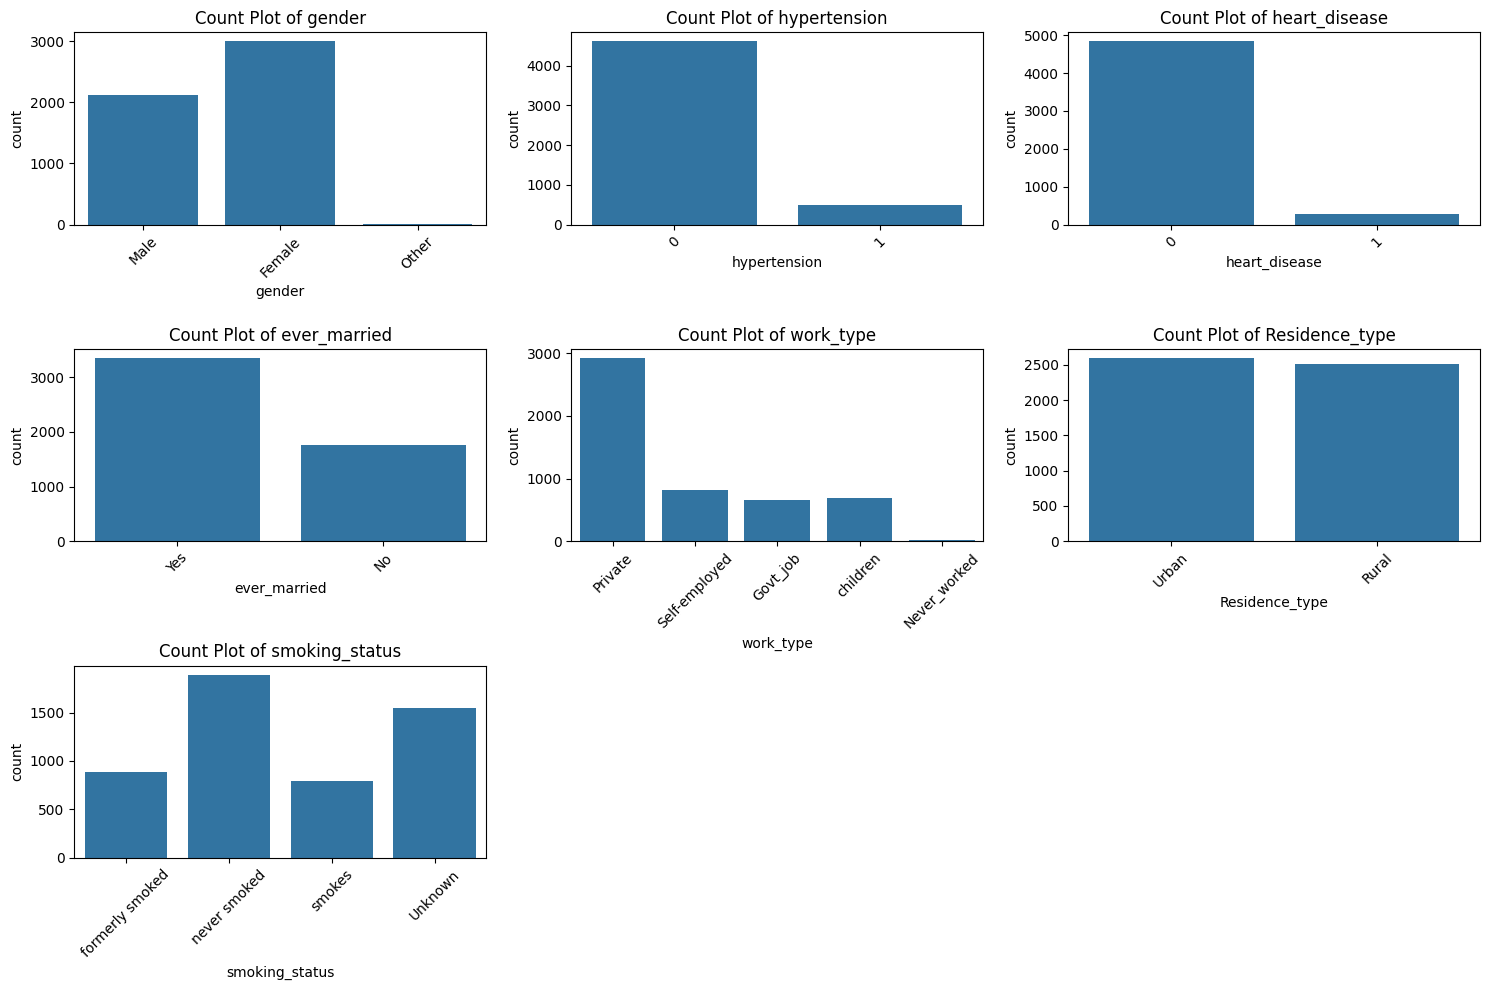

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Non-Graphical Analysis
for column in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    print(f"Counts for {column}:")
    print(data[column].value_counts())
    print("\nUnique Values:")
    print(data[column].unique())
    print("\n")

# Graphical Analysis
plt.figure(figsize=(15, 10))
for i, column in enumerate(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=column)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Q2: Comparison of Patients with and without Stroke

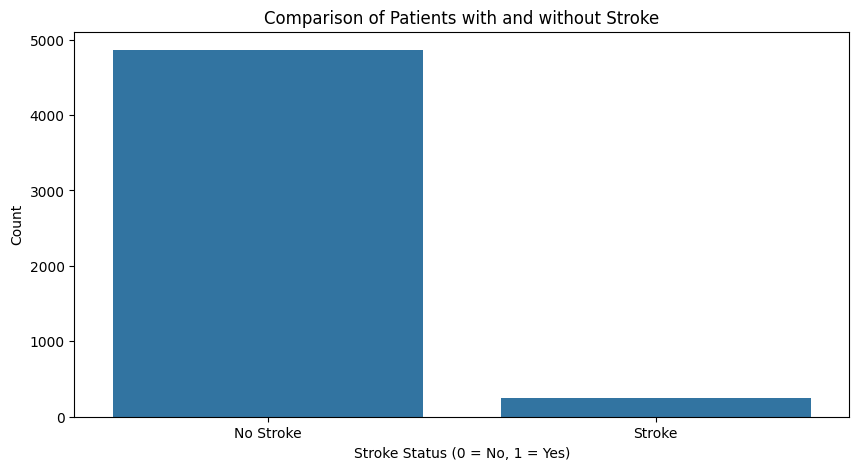

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x='stroke', data=data)
plt.title('Comparison of Patients with and without Stroke')
plt.xlabel('Stroke Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'])
plt.show()


Q3: Stroke Patients by Gender

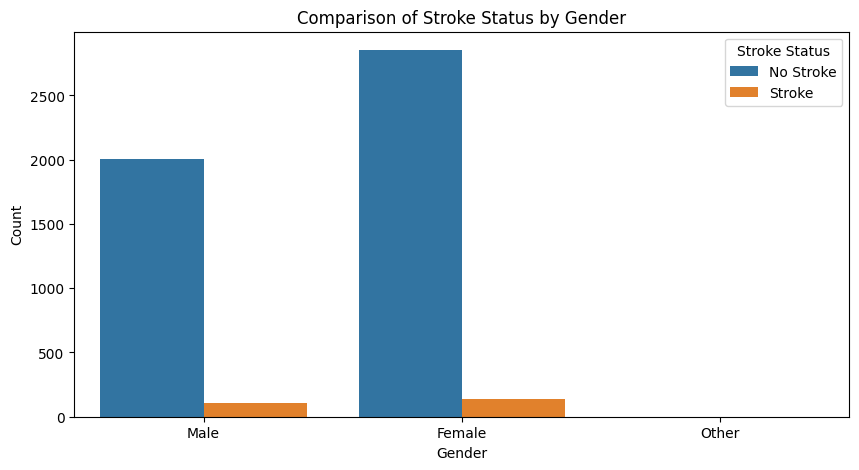

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x='gender', hue='stroke', data=data)
plt.title('Comparison of Stroke Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke Status', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()


Q4: Duration Based on Age Groups

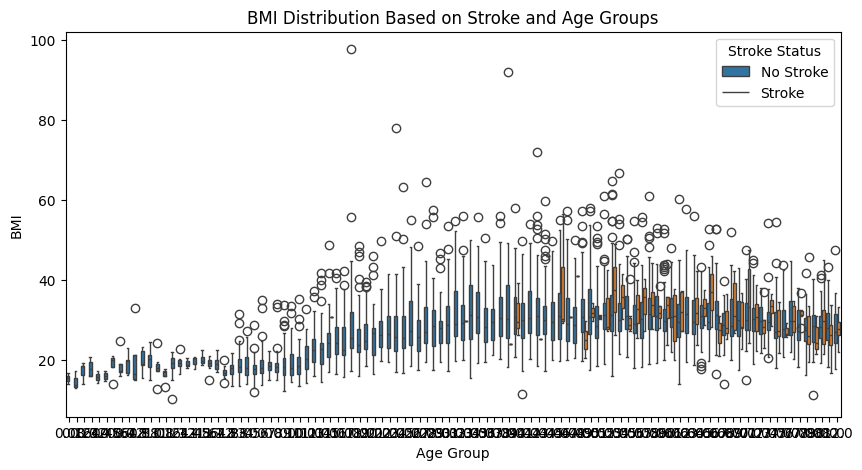

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='age', y='bmi', hue='stroke', data=data)
plt.title('BMI Distribution Based on Stroke and Age Groups')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.legend(title='Stroke Status', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()
